In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('catfish.csv')
data.tail()

,Date,Total
319,2012-8-01,14442
320,2012-9-01,13422
321,2012-10-01,13795
322,2012-11-01,13352
323,2012-12-01,12716


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    324 non-null    object
 1   Total   324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    324 non-null    datetime64[ns]
 1   Total   324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [10]:
data.describe()

,Total
count,324.000000
mean,19643.984568
std,5039.324331
min,8196.000000
25%,15764.000000
50%,19660.500000
75%,23604.500000
max,30485.000000


In [11]:
data['Date'].describe()

C:\Users\LPT-3036\AppData\Local\Temp\ipykernel_8400\3734259392.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Date'].describe()


count                     324
unique                    324
top       1986-01-01 00:00:00
freq                        1
first     1986-01-01 00:00:00
last      2012-12-01 00:00:00
Name: Date, dtype: object

In [24]:
data=data.set_index('Date')

<AxesSubplot:xlabel='Date'>

<Figure size 1800x1080 with 0 Axes>

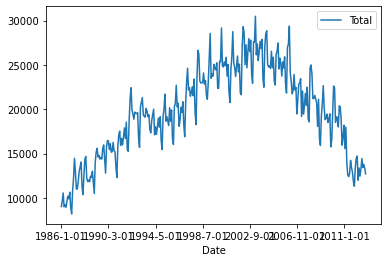

In [25]:
plt.figure(figsize=(25,15))
data.plot()

In [27]:
# index is date bcoz of set_index
data.head()

,Total
Date,
1986-1-01,9034
1986-2-01,9596
1986-3-01,10558
1986-4-01,9002
1986-5-01,9239


In [103]:
# We are selecting start date and end date for train data
start_date='2000-1-01'
end_date='2005-12-01'

test_end = '2006-12-01'
# we can do string concate here bcoz date is index
train_data=data[start_date:end_date]
test_data = data[end_date:test_end]

In [36]:
train_data.head()

,Total
Date,
2000-1-01,25412
2000-2-01,25354
2000-3-01,29161
2000-4-01,24924
2000-5-01,24763


In [40]:
# Rolling(6) checks the data for 6 months back and takes mean for it. Now there are no 6 month old data for 1st 5 months so NAN is output.
train_data.rolling(6).mean().head(10)

,Total
Date,
2000-1-01,NaN
2000-2-01,NaN
2000-3-01,NaN
2000-4-01,NaN
2000-5-01,NaN
2000-6-01,25826.000000
2000-7-01,25742.500000
2000-8-01,25824.666667
2000-9-01,24921.666667


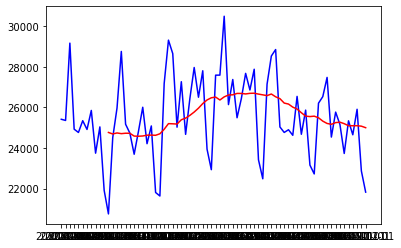

In [58]:

org=plt.plot(train_data,color='blue')
roll_mean = train_data.rolling(12).mean()
plt.plot(roll_mean,color='red')

In [43]:
# check the stationarity

from statsmodels.tsa.stattools import adfuller

adfuller(train_data)

(-1.2604126680339702,
 0.6470834714774281,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1008.0895614754529)

In [48]:
# P value from liner regression? remember? it is same.

# NULL HYPOTHESIS  :  Data is stationary
# ALTERNATE HYPOTHESIS  :  Data is not stationary

result = adfuller(train_data)
result[1]  # P value>0.05 # so we fail to accept null hypothesis #  so data is not stationary and we reject the null hypothesis

0.6470834714774281

In [51]:
# Since data is not stationary we want to make it stationary so we are doing first order differencing
print(train_data.head())
train_data.shift(1)  # So Shift move 1st jan data to 2nd Jan. shifted data 1 row down.

           Total
Date            
2000-1-01  25412
2000-2-01  25354
2000-3-01  29161
2000-4-01  24924
2000-5-01  24763


,Total
Date,
2000-1-01,NaN
2000-2-01,25412.0
2000-3-01,25354.0
2000-4-01,29161.0
2000-5-01,24924.0
...,...
2005-8-01,23729.0
2005-9-01,25336.0
2005-10-01,24649.0


In [54]:
# to do the differencing we can do shited_data - original data

diff1 = train_data - train_data.shift(1)
diff1

,Total
Date,
2000-1-01,NaN
2000-2-01,-58.0
2000-3-01,3807.0
2000-4-01,-4237.0
2000-5-01,-161.0
...,...
2005-8-01,1607.0
2005-9-01,-687.0
2005-10-01,1255.0


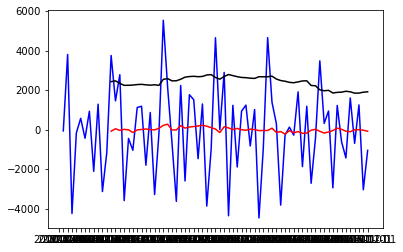

In [66]:
# plotting differenced data to check if it is stationary or not
org=plt.plot(diff1,color='blue')
roll_mean = diff1.rolling(12).mean()
plt.plot(roll_mean,color='red')

roll_std = diff1.rolling(12).std()
plt.plot(roll_std,color='black')

# From this graph we can see that mean and std deviation is stationary so we can also find p value just to be double sure.

In [65]:
result = adfuller(diff1[1:])   # so here the data we are getting is stationary.
result[1] 

0.01782781681588369

In [73]:
from statsmodels.tsa.stattools import acf,pacf
# we can uses[1:] or dropna()
acf(diff1[1:],nlags=20)

array([ 1.        , -0.23099526, -0.07885388, -0.2706137 , -0.21459961,
        0.37991933, -0.13797673,  0.40441394, -0.22080298, -0.29213196,
       -0.03776567, -0.13395613,  0.73262611, -0.18008876, -0.06005906,
       -0.21013295, -0.17340052,  0.29228269, -0.13002975,  0.35456701,
       -0.15126945])

In [74]:
lag_acf = acf(diff1.dropna(),nlags=20)

In [76]:
lag_pacf = pacf(diff1.dropna(),nlags=20)
lag_pacf

array([ 1.        , -0.23429519, -0.14393494, -0.36522234, -0.52761478,
        0.03562732, -0.36076336,  0.31288833,  0.04506755, -0.29844225,
       -0.33184235, -0.57127755,  0.57334513,  0.28024834,  0.24248966,
        0.03008415, -0.02406142, -0.05905357, -0.36430752, -0.22584969,
        0.25371601])

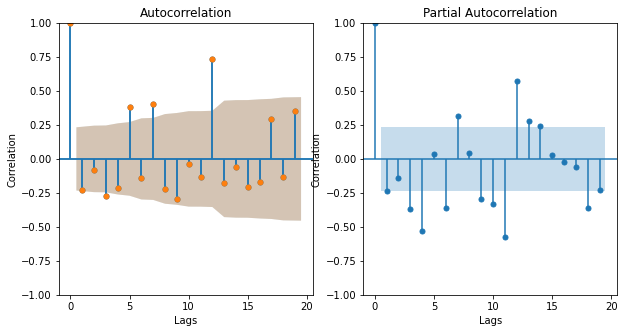

In [83]:
sm.graphics.tsa.plot_acf(diff1.dropna(),ax=ax1)

D:\Download\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


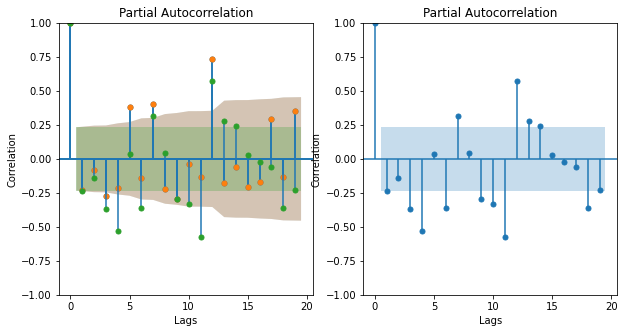

In [84]:
sm.graphics.tsa.plot_pacf(diff1.dropna(),ax=ax1)

D:\Download\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation')

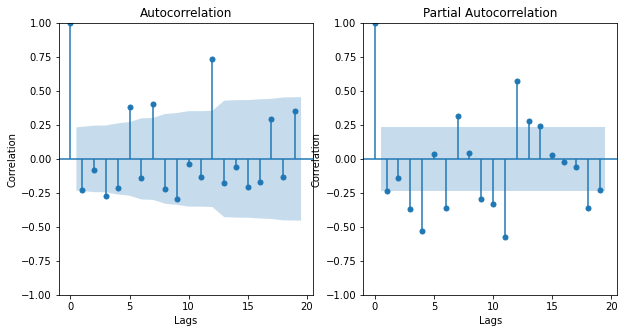

In [82]:
import statsmodels.api as sm

fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
sm.graphics.tsa.plot_acf(diff1.dropna(),ax=ax1)  # It is MA(Q) model  - learns from previous errors and learns from their
ax2=fig.add_subplot(1,2,2)
sm.graphics.tsa.plot_pacf(diff1.dropna(),ax=ax2)  # It is AR(P) model - learns from previous data
plt.xlabel('Lags')
plt.ylabel('Correlation')

In [89]:
from statsmodels.tsa.arima.model import ARIMA

diff1 =diff1.dropna()

In [110]:
p=12
q=12
d=0 # no differencing required as we had already done one order differencing. 

# we can also do d=1 and use original dataset instead of differentiated data.
model = ARIMA(diff1,order=(p,d,q))
results_arima = model.fit()

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

In [92]:
results_arima

In [95]:
results_arima.fittedvalues

Date
2000-2-01      -50.514983
2000-3-01      -53.667607
2000-4-01     1768.715748
2000-5-01    -1673.819972
2000-6-01    -1397.298964
                 ...     
2005-8-01     1514.150454
2005-9-01    -1062.002094
2005-10-01    1148.643181
2005-11-01   -2926.981158
2005-12-01     -70.713893
Length: 71, dtype: float64

In [138]:
diff1

,Total
Date,
2000-2-01,-58.0
2000-3-01,3807.0
2000-4-01,-4237.0
2000-5-01,-161.0
2000-6-01,579.0
...,...
2005-8-01,1607.0
2005-9-01,-687.0
2005-10-01,1255.0


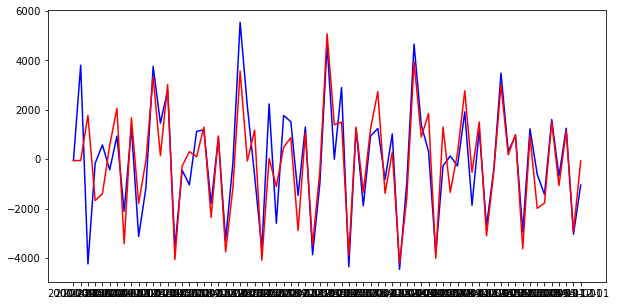

In [102]:
plt.figure(figsize=(10,5))
plt.plot(diff1,color='blue')
plt.plot(results_arima.fittedvalues,color='red')

# observation - there is not much difference in data so it is good model.

In [121]:
len(test_data)

13

D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Download\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

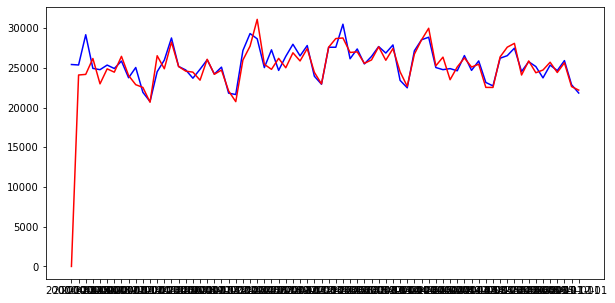

In [179]:
from datetime import timedelta

from statsmodels.tsa.arima.model import ARIMA

# p=12
# q=12
# d=1 # differencing requrd on test data

# we can also do d=1 and use original dataset instead of differentiated data.
model = ARIMA(train_data,order=(p,d,q))
results_arima = model.fit()


plt.figure(figsize=(10,5))
plt.plot(train_data,color='blue')
plt.plot(results_arima.fittedvalues,color='red')


In [180]:
results_arima.fittedvalues

Date
2000-1-01         0.000000
2000-2-01     24093.578279
2000-3-01     24169.178879
2000-4-01     26167.636619
2000-5-01     22979.444565
                  ...     
2005-8-01     25698.779197
2005-9-01     24406.477778
2005-10-01    25626.207933
2005-11-01    22637.118119
2005-12-01    22188.564493
Length: 72, dtype: float64

In [198]:
test_start = '2006-1-01'
test_end = '2006-12-01'
test_data = data[test_start:test_end]

In [199]:
len(test_data)

12

In [200]:
forecasted_test_vals = results_arima.forecast(len(test_data))  # we r forecasting for next 13 months so passing length
forecasted_test_vals

2006-01-01    24950.535057
2006-02-01    26371.957280
2006-03-01    28045.233863
2006-04-01    24718.533351
2006-05-01    26102.794675
2006-06-01    24525.450336
2006-07-01    23792.794119
2006-08-01    25739.640430
2006-09-01    25100.146172
2006-10-01    26069.577148
2006-11-01    22765.851314
2006-12-01    22240.851924
Freq: MS, Name: predicted_mean, dtype: float64

In [201]:
test_data

,Total
Date,
2006-1-01,26955
2006-2-01,27349
2006-3-01,29367
2006-4-01,24071
2006-5-01,23173
2006-6-01,21740
2006-7-01,22056
2006-8-01,23923
2006-9-01,22189


In [176]:
forecasted_vals_test.index.tz_localize(None)

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01'], dtype='datetime64[ns]', freq='MS')

In [204]:
plt.plot(test_data, color='black', label='test_actuals')
plt.plot(forecasted_test_vals, color = 'orange', label='test_forecasted')

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

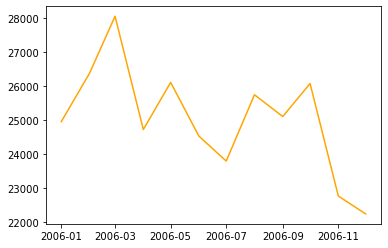

In [203]:
plt.plot(forecasted_test_vals, color = 'orange', label='test_forecasted')

In [221]:

forecasted_test_vals = forecasted_test_vals.rename(columns={'predicted_mean': 'Total'})
forecasted_test_vals

,Total
2006-01-01,24950
2006-02-01,26371
2006-03-01,28045
2006-04-01,24718
2006-05-01,26102
2006-06-01,24525
2006-07-01,23792
2006-08-01,25739
2006-09-01,25100
2006-10-01,26069


In [222]:
test_data.info()  , forecasted_test_vals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2006-1-01 to 2006-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0+ bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2006-01-01 to 2006-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


(None, None)

In [217]:
forecasted_test_vals = pd.DataFrame(forecasted_test_vals)
forecasted_test_vals=forecasted_test_vals.astype('int64')

In [223]:
plt.figure(figsize=(10,5))

plt.plot(train_data, label='train_actuals')
plt.plot(results_arima.fittedvalues, color='red', label='train_forecasted')

plt.plot(test_data, color='black', label='test_actuals')
plt.plot(forecasted_test_vals, color = 'orange', label='test_forecasted')

plt.legend()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

C:\Users\LPT-3036\AppData\Local\Temp\ipykernel_8400\152723840.py:2: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(test_data,color='black', label='test_actuals')


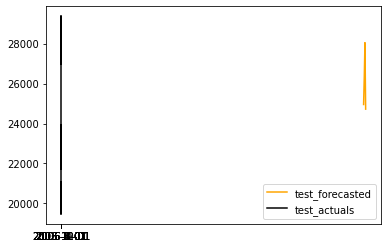

In [224]:
plt.plot(forecasted_vals_test,color='orange', label='test_forecasted') 
plt.plot(test_data,color='black', label='test_actuals')
plt.legend()

In [225]:
plt.plot(train_data,color='yellow',label='train_actuals')
plt.plot(results_arima1.fittedvalues,color='red',label='train_forecasted')

plt.plot(test_data,color='black', label='test_actuals')
plt.plot(forecasted_test_vals,color='orange', label='test_forecasted') 

plt.legend()

TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

In [226]:
test_data['Total']

Date
2006-1-01     26955
2006-2-01     27349
2006-3-01     29367
2006-4-01     24071
2006-5-01     23173
2006-6-01     21740
2006-7-01     22056
2006-8-01     23923
2006-9-01     22189
2006-10-01    22458
2006-11-01    19476
2006-12-01    21056
Name: Total, dtype: int64

In [228]:
residuals = test_data['Total']-forecasted_test_vals
residuals

,2006-1-01,2006-10-01,2006-11-01,2006-12-01,2006-2-01,2006-3-01,2006-4-01,2006-5-01,2006-6-01,2006-7-01,2006-8-01,2006-9-01,Total
2006-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
